In [1]:
from GasDynamicsSim import ShockSim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_shock(input_file, N):
    chunks = pd.read_csv(input_file, chunksize=N)
    data = pd.concat(chunks)
    return data

C:\Users\Jackie Zheng\PycharmProjects\stanshock_adapt\stanShock.py:394: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getCp_python" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(int64, dtype=Function(<class 'int'>))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload of function 'zeros': File: numba\core\typing\npydecl.py: Line 507.
    With argument(s): '(int64, dtype=Function(<class 'int'>))':
   No match.

During: resolving callee type: Function(<built-in function zeros>)
During: typing of call at C:\Users\Jackie Zheng\PycharmProjects\stanshock_adapt\stanShock.py (417)


File "stanShock.py", line 417:
def getCp_python(T,Y,TTable,a,b):
    <source elided>
    #determine the indices
    indices = np.zeros(nX,dtype=int)
    ^

  def getCp_python(T,Y,TTable,a,b):
C:\Users\Jackie Zheng\PycharmProjects\stanshock_ada

Iteration: 100. Current time: 0.001906. Final time: 0.035000. Time step: 1.864756e-05.
Iteration: 200. Current time: 0.003768. Final time: 0.035000. Time step: 1.859812e-05.
Iteration: 300. Current time: 0.005626. Final time: 0.035000. Time step: 1.856528e-05.
Iteration: 400. Current time: 0.007482. Final time: 0.035000. Time step: 1.855952e-05.
Iteration: 500. Current time: 0.009339. Final time: 0.035000. Time step: 1.858006e-05.
Iteration: 600. Current time: 0.011198. Final time: 0.035000. Time step: 1.860639e-05.
Iteration: 700. Current time: 0.013061. Final time: 0.035000. Time step: 1.865364e-05.
Iteration: 800. Current time: 0.015168. Final time: 0.035000. Time step: 2.214957e-05.
Iteration: 900. Current time: 0.017437. Final time: 0.035000. Time step: 2.342682e-05.
Iteration: 1000. Current time: 0.019888. Final time: 0.035000. Time step: 2.506291e-05.
Iteration: 1100. Current time: 0.022348. Final time: 0.035000. Time step: 2.425570e-05.
Iteration: 1200. Current time: 0.024814. 

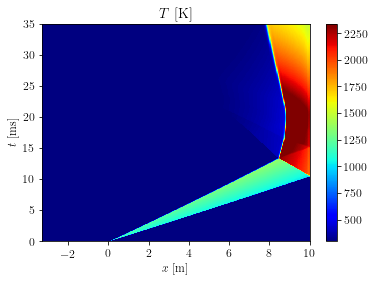

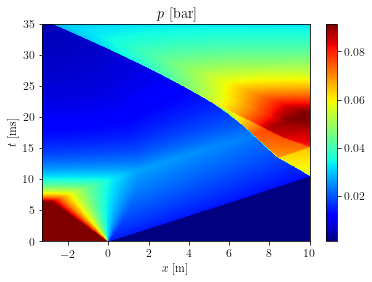

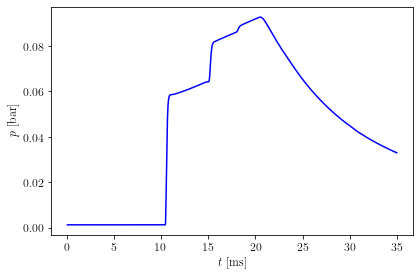

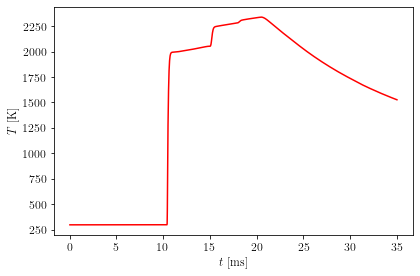

In [2]:
Mixture = {
    'mechanism':"O2Argon.xml",
    'X1':"O2:0.02, AR:0.98",
    'X4':"HE:0.7, N2:0.3"
}

Thermal = {
    'p4':1.8*6894.76,#0.1*101325,
    'p1':1*133.322,
    'T1':23+273,
}


Sim = {
    'nXFine':500, #grid definition
    'tFinal':35e-3, # simulation time
    'alpha':0.7, # boundary layer correction term for shear stress. 1 for incompressible case
    'beta':0.3, # boundary layer correction term for heat transfer. 1 for incompressible case
    'D_mul':1, # boundary layer correction term for effective diameter. 1 for incompressible case
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': False
}

Geometry = {
    'LDriver':3.3,# driver section length
    'LDriven':10,# driven section length
    'DDriver':15.24e-2, # driver section diameter
    'DDriven':15.24e-2 # driven section diameter
}

ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)
ssim.XT_Diagram()

In [8]:
import os

cwd = os.getcwd()
file_loc = r"C:\Users\Jackie Zheng\Box Sync\Jackie Research\Jesse Simulations"
os.chdir(file_loc)
folder_name = '\Sim_029'
os.mkdir(file_loc + folder_name)
os.chdir(file_loc + folder_name)
np.savetxt('TMatrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMatrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')
os.chdir(cwd)

Iteration: 100. Current time: 0.001192. Final time: 0.035000. Time step: 1.150024e-05.
Iteration: 200. Current time: 0.002342. Final time: 0.035000. Time step: 1.150797e-05.
Iteration: 300. Current time: 0.003493. Final time: 0.035000. Time step: 1.151438e-05.
Iteration: 400. Current time: 0.004645. Final time: 0.035000. Time step: 1.152320e-05.
Iteration: 500. Current time: 0.005798. Final time: 0.035000. Time step: 1.153479e-05.
Iteration: 600. Current time: 0.006952. Final time: 0.035000. Time step: 1.154985e-05.
Iteration: 700. Current time: 0.008108. Final time: 0.035000. Time step: 1.156773e-05.
Iteration: 800. Current time: 0.009266. Final time: 0.035000. Time step: 1.158873e-05.
Iteration: 900. Current time: 0.010426. Final time: 0.035000. Time step: 1.161154e-05.
Iteration: 1000. Current time: 0.011588. Final time: 0.035000. Time step: 1.163620e-05.
Iteration: 1100. Current time: 0.012753. Final time: 0.035000. Time step: 1.166266e-05.
Iteration: 1200. Current time: 0.013921. 

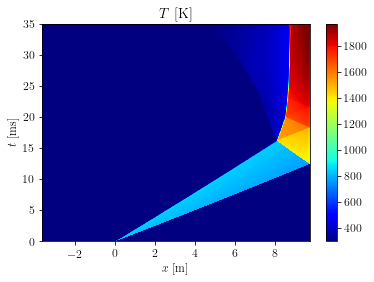

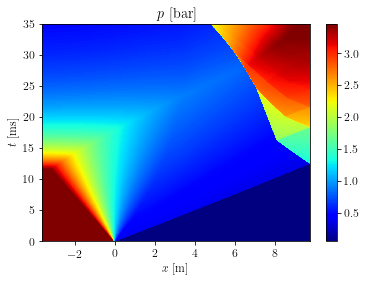

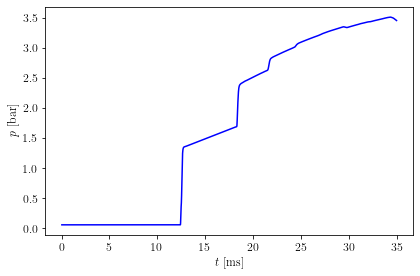

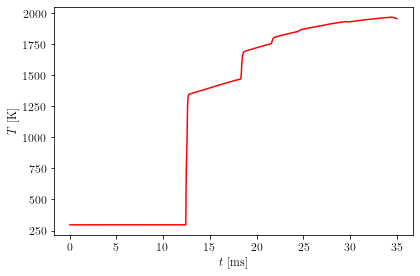

In [22]:
Mixture = {
    'mechanism':"O2Argon.xml",
    'X4':"N2:1",
    'X1':"AR:1"
}


Thermal = {
    'p4':66*6894.76,#27.5*6894.76,
    'p1':40.559*133.322,#88.2*133.322,
    'T1':22.7+273,
}

Sim = {
    'nXFine':1000,
    'tFinal':35e-3,
    'ProbeLoc': 2e-2,
    'alpha':0.9, # boundary layer correction term for shear stress. 1 for incompressible case
    'beta':0.8, # boundary layer correction term for heat transfer. 1 for incompressible case
    'D_mul':1, # boundary layer correction term for effective diameter. 1 for incompressible case
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': False
}

Geometry = {
    'LDriver':3.63,#3.63,#9.57,
    'LDriven':9.73,
    'DDriver':11.53e-2,
    'DDriven':11.53e-2
}
ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)
ssim.XT_Diagram()

In [27]:
import os

cwd = os.getcwd()
file_loc = r"C:\Users\Jackie Zheng\Box Sync\Jackie Research\Jesse Simulations"
os.chdir(file_loc)
folder_name = '\Sim_030'
os.mkdir(file_loc + folder_name)
os.chdir(file_loc + folder_name)
np.savetxt('TMatrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMatrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')
os.chdir(cwd)

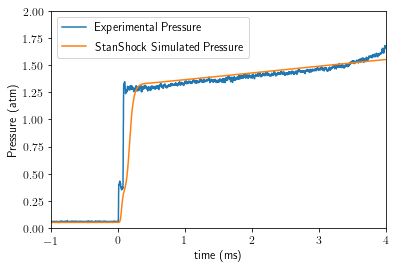

In [25]:
p = ssim.pNoInsert
T = ssim.TNoInsert
t = ssim.tNoInsert
s = ssim.sNoInsert
u = ssim.uNoInsert

Num_row = 5000
# shock measurement
exp = np.array(get_shock('exp038.csv', Num_row))
plt.figure()
#plt.plot(t/(1e-3), np.abs(u/s))
plt.plot(exp[:, 0]/(1e-3) + 10-12.35, exp[:, 1]/(101325), label = 'Experimental Pressure')
plt.plot(t/(1e-3)-12.4, p/(101325), label = 'StanShock Simulated Pressure')
plt.xlabel('time (ms)')
plt.ylabel('Pressure (atm)')
plt.xlim((-1, 4))
plt.ylim((0, 2))
plt.legend()

In [ ]:
Mixture = {
    'mixtureFile':"O2Argon.xml",
    'X1':"O2:0.02, AR:0.98",
    'X4':"HE:1"
}

Thermal = {
    'p5':0.45*101325,
    'p1':299.9753,
    'T5':5280,
    'g4':5/3,
    'g1':0.98*(5/3)+0.02*(7/5),
    'W4':4,
    'W1':0.02*32+0.98*39.95
}

Sim = {
    'nXFine':250,
    'tFinal':13e-3,
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': False
}

Geometry = {
    'LDriver':3.3,#9.57,
    'LDriven':10,
    'DDriver':15.24e-2,
    'DDriven':15.24e-2
}
ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)

ssim.XT_DiagramT5p5p1()

In [3]:

p = ssim.pNoInsert
T = ssim.TNoInsert
t = ssim.tNoInsert
s = ssim.sNoInsert
u = ssim.uNoInsert

Text(0, 0.5, 'Pressure (atm)')

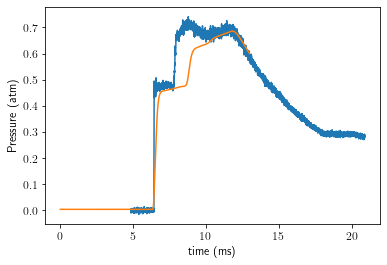

In [6]:
Num_row = 5000
# shock measurement
exp = np.array(get_shock('5280K_PressureTimeHistory.csv', Num_row))
plt.figure()
#plt.plot(t/(1e-3), np.abs(u/s))
plt.plot(exp[:, 0]/(1e-3) + 6.4847, exp[:, 1])
plt.plot(t/(1e-3), p/(101325))
plt.xlabel('time (ms)')
plt.ylabel('Pressure (atm)')
#plt.xlim((5, 10))

In [10]:
import numpy as np

In [ ]:
np.savetxt('T_bondChem.csv', T, delimiter=',')
np.savetxt('p_bondChem.csv', p, delimiter=',')
np.savetxt('time_bondChem.csv', t, delimiter=',')
#np.savetxt('Y_bondChem.csv', Y, delimiter=',')

In [11]:
np.savetxt('TMatrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMatrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')

In [6]:
np.tan(-3.2/180*np.pi)

-0.05590867980926056